In [25]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt


In [24]:
roi = cv.imread(r'C:\Users\kapil\Desktop\barrel.jpg')
hsv = cv.cvtColor(roi,cv.COLOR_BGR2HSV)

# calculating object histogram
roihist = cv.calcHist([hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )

# normalize histogram 
cv.normalize(roihist,roihist,0,255,cv.NORM_MINMAX)


#target = cv.imread(r'C:\Users\kapil\Desktop\Screenshot (57).png')
#hsvt = cv.cvtColor(target,cv.COLOR_BGR2HSV)


cap = cv.VideoCapture(r'C:\Users\kapil\Desktop\IGVC 2015 UNSW Advanced Course GoPro - Speed Record.mp4')
while cap.isOpened():
    ret, frame = cap.read()
# if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    hsvt = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
#backproject
    res = cv.calcBackProject([hsvt],[0,1],roihist,[0,180,0,256],1)

# Now convolute with circular disc
    disc = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5,5))
    cv.filter2D(res, -1, disc, res) #res is the matrix obtained after back projection
    
# threshold and binary AND
    ret,thresh = cv.threshold(res,50,255,0)
    final = cv.merge((thresh,thresh,thresh))
    #result = cv.bitwise_and(frame,final)
    result = cv.bitwise_or(frame,final)
    cv.imshow('frame', hsvt)
    if cv.waitKey(1) == ord('q'):
        break
cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting ...


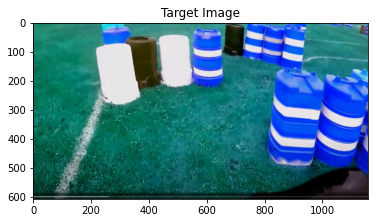

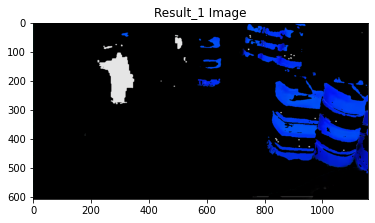

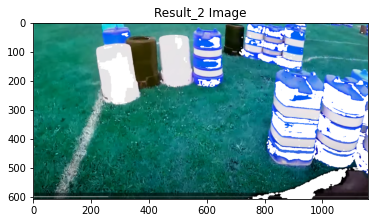

In [35]:
roi = cv.imread(r'C:\Users\kapil\Desktop\barrel.jpg')
hsv = cv.cvtColor(roi,cv.COLOR_BGR2HSV)

# calculating object histogram
roihist = cv.calcHist([hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )

# normalize histogram 
cv.normalize(roihist,roihist,0,255,cv.NORM_MINMAX)

target = cv.imread(r'C:\Users\kapil\Desktop\Screenshot (57).png')
hsvt = cv.cvtColor(target,cv.COLOR_BGR2HSV)

#backproject
res = cv.calcBackProject([hsvt],[0,1],roihist,[0,180,0,256],1)

# Now convolute with circular disc
disc = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5,5))
cv.filter2D(res, -1, disc, res) #res is the matrix obtained after back projection
    
# threshold and binary AND
ret,thresh = cv.threshold(res,50,255,0)
final = cv.merge((thresh,thresh,thresh))
result_1 = cv.bitwise_and(target,final)
result_2 = cv.bitwise_or(target,final)

plt.figure(),plt.title("Target Image"),plt.imshow(target)
plt.figure(),plt.title("Result_1 Image"),plt.imshow(result_1)
plt.figure(),plt.title("Result_2 Image"),plt.imshow(result_2)
plt.show()